In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from dowhy import gcm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from econml.dml import LinearDML

# Set colours for plots
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

In [4]:
def plot_graph(input_graph, node_lookup):
    '''
    Function to visualise graphs.

    Args:
        input_graph (array): Adjacency matrix representing graph
        node_lookup (dict): Dictionary containing node names.
    '''
    
    graph = nx.DiGraph(input_graph)

    plt.figure(figsize=(7, 7))
    nx.draw(
    G=graph,
    node_color=COLORS[0],
    node_size=7000,
    arrowsize=17,
    with_labels=True,
    labels=node_lookup,
    font_color='white',
    font_size=9,
    pos=nx.circular_layout(graph)
    )

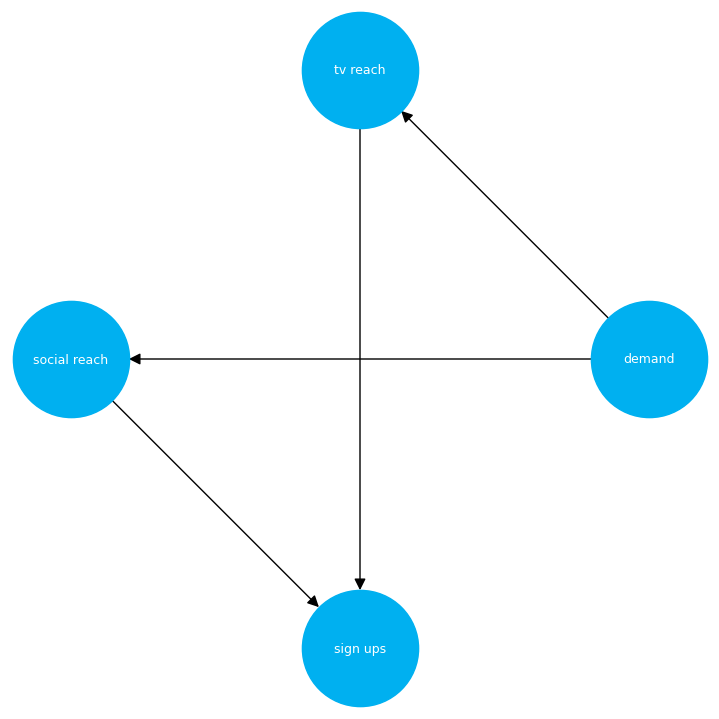

In [75]:
# Create node lookup for channels
node_lookup = {0: 'demand',
               1: 'tv reach',
               2: 'social reach',
               3: 'sign ups'                                                                          
 }

total_nodes = len(node_lookup)

# Create adjacency matrix - this is the basis for our known graph
graph_actual = np.zeros((total_nodes, total_nodes))

# Create known graph using expert domain knowledge
graph_actual[0, 1] = 1.0 # demand -> tv reach
graph_actual[0, 2] = 1.0 # demand -> social reach
graph_actual[1, 3] = 1.0 # tv reach -> signups
graph_actual[2, 3] = 1.0 # social reach -> signups

plot_graph(input_graph=graph_actual, node_lookup=node_lookup)

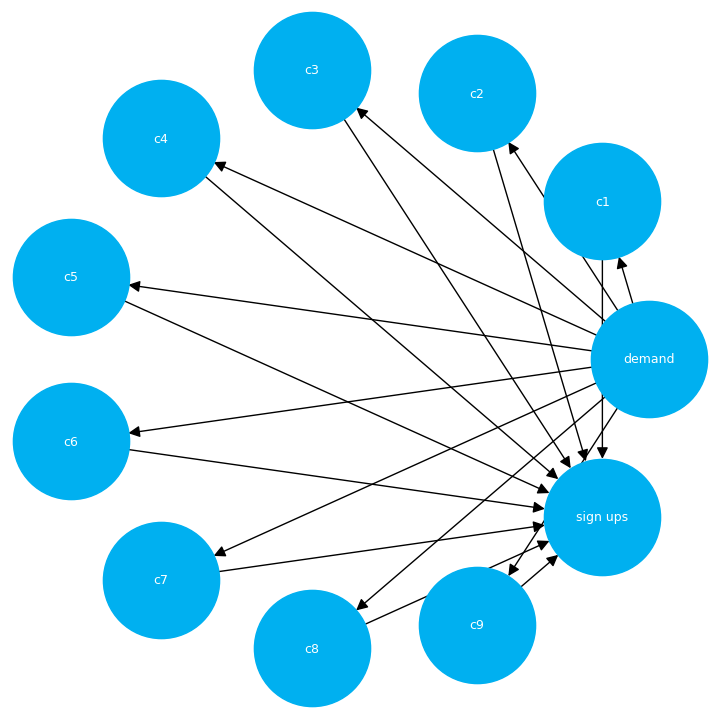

In [62]:
# Create node lookup for channels
node_lookup = {0: 'demand',
               1: 'c1',
               2: 'c2',
               3: 'c3',               
               4: 'c4',              
               5: 'c5',                
               6: 'c6',                
               7: 'c7',
               8: 'c8',               
               9: 'c9',                            
               10: 'sign ups'                                                                          
 }

total_nodes = len(node_lookup)

# Create adjacency matrix - this is the basis for our known graph
graph_actual = np.zeros((total_nodes, total_nodes))

# Create known graph using expert domain knowledge
graph_actual[0, 1] = 1.0
graph_actual[0, 2] = 1.0
graph_actual[0, 3] = 1.0
graph_actual[0, 4] = 1.0
graph_actual[0, 5] = 1.0
graph_actual[0, 6] = 1.0
graph_actual[0, 7] = 1.0
graph_actual[0, 8] = 1.0
graph_actual[0, 9] = 1.0
graph_actual[1, 10] = 1.0
graph_actual[2, 10] = 1.0
graph_actual[3, 10] = 1.0
graph_actual[4, 10] = 1.0
graph_actual[5, 10] = 1.0
graph_actual[6, 10] = 1.0
graph_actual[7, 10] = 1.0
graph_actual[8, 10] = 1.0
graph_actual[9, 10] = 1.0

plot_graph(input_graph=graph_actual, node_lookup=node_lookup)

<Axes: >

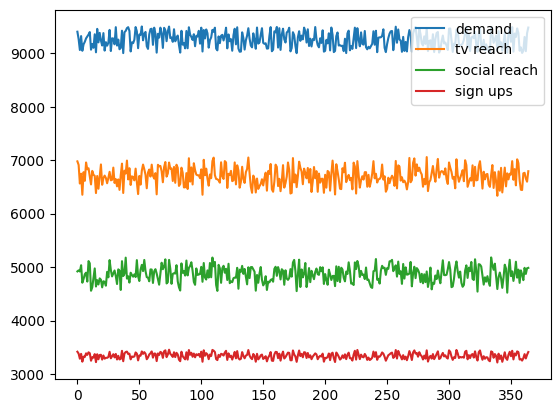

In [85]:
# Set random seed
np.random.seed(999)

population = 10000

df = pd.DataFrame(columns=node_lookup.values())
df[node_lookup[0]] = population * np.random.uniform(0.90, 0.95, 365)
#df[node_lookup[1]] = 0.80 * df[node_lookup[0]] + population * np.random.uniform(0.01, 0.02, 365)
df[node_lookup[1]] = df[node_lookup[0]] * np.random.uniform(0.70, 0.75, 365)
#df[node_lookup[2]] = 0.60 * df[node_lookup[0]] + population * np.random.uniform(0.01, 0.02, 365)
df[node_lookup[2]] = df[node_lookup[0]] * np.random.uniform(0.50, 0.55, 365)
df[node_lookup[3]] = 0.20 * df[node_lookup[0]] + 0.15 * df[node_lookup[1]] + 0.10 * df[node_lookup[2]]

df.plot()

<Axes: xlabel='demand', ylabel='social reach'>

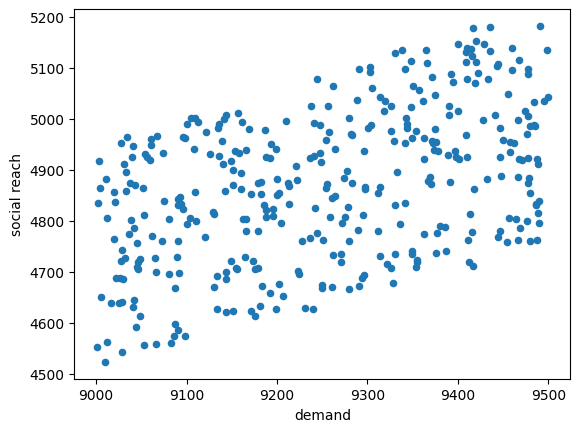

In [86]:
df.plot.scatter(x='demand', y='social reach')

<Axes: >

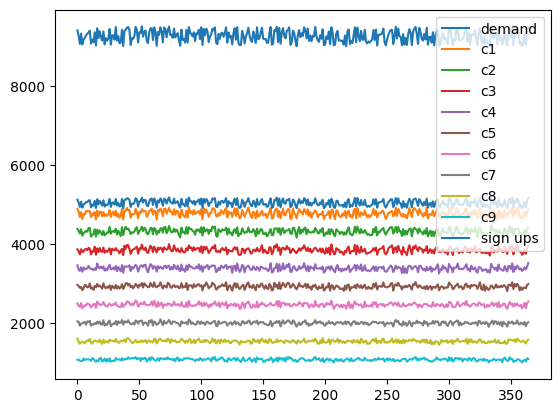

In [73]:
# Set random seed
np.random.seed(999)

population = 10000

df = pd.DataFrame(columns=node_lookup.values())
df[node_lookup[0]] = population * np.random.uniform(0.90, 0.95, 365)
df[node_lookup[1]] = 0.50 * df[node_lookup[0]] + population * np.random.uniform(0.01, 0.02, 365)
df[node_lookup[2]] = 0.45 * df[node_lookup[0]] + population * np.random.uniform(0.01, 0.02, 365)
df[node_lookup[3]] = 0.40 * df[node_lookup[0]] + population * np.random.uniform(0.01, 0.02, 365)
df[node_lookup[4]] = 0.35 * df[node_lookup[0]] + population * np.random.uniform(0.01, 0.02, 365)
df[node_lookup[5]] = 0.30 * df[node_lookup[0]] + population * np.random.uniform(0.01, 0.02, 365)
df[node_lookup[6]] = 0.25 * df[node_lookup[0]] + population * np.random.uniform(0.01, 0.02, 365)
df[node_lookup[7]] = 0.20 * df[node_lookup[0]] + population * np.random.uniform(0.01, 0.02, 365)
df[node_lookup[8]] = 0.15 * df[node_lookup[0]] + population * np.random.uniform(0.01, 0.02, 365)
df[node_lookup[9]] = 0.10 * df[node_lookup[0]] + population * np.random.uniform(0.01, 0.02, 365)
df[node_lookup[10]] = 0.20 * df[node_lookup[0]] + 0.18 * df[node_lookup[1]] + 0.16 * df[node_lookup[2]]+ 0.14 * df[node_lookup[3]] + 0.12 * df[node_lookup[4]]
+ 0.10 * df[node_lookup[5]]+ 0.08 * df[node_lookup[6]] + 0.06 * df[node_lookup[7]] + 0.04 * df[node_lookup[8]] + 0.02 * df[node_lookup[9]]

df.plot()

In [74]:
df

,demand,c1,c2,c3,c4,c5,c6,c7,c8,c9,sign ups
0,9401.714020,4885.231142,4377.529540,3864.874881,3460.536657,2962.575805,2497.264645,2042.734629,1602.747829,1070.655542,5120.561872
1,9263.761148,4824.006132,4335.275921,3814.767719,3351.955650,2936.562034,2437.446988,2034.718942,1530.020594,1078.571422,5044.526991
2,9059.555733,4678.744526,4262.754497,3738.895341,3320.280353,2892.113569,2407.839464,1934.370885,1474.540113,1045.437202,4935.795986
3,9319.840722,4807.830142,4374.603677,3866.689094,3411.202745,2913.278688,2506.326810,1985.438406,1504.791455,1040.326793,5071.953473
4,9045.462631,4627.566110,4211.604732,3798.928980,3295.218455,2832.202674,2373.329197,1994.704662,1530.410065,1036.395251,4917.900645
...,...,...,...,...,...,...,...,...,...,...,...
360,9045.587391,4716.218502,4222.353126,3761.998446,3348.590161,2887.571412,2427.857150,1963.376474,1555.176822,1053.563438,4946.190554
361,9303.506789,4805.825127,4358.751039,3840.052861,3414.200486,2898.459222,2510.014525,2027.192759,1516.833033,1069.317063,5064.799818
362,9037.726920,4692.063782,4245.374810,3750.533900,3355.223629,2878.521460,2374.788854,1920.395451,1481.087155,1034.705385,4932.074991
363,9374.509552,4794.921416,4380.827755,3874.449680,3429.388890,2962.589199,2496.643860,1994.350806,1557.242596,1111.230777,5093.035624


In [87]:
# Calculate the VIF for each feature
X = df[['demand', 'tv reach', 'social reach']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,const,3929.538934
1,demand,2.001199
2,tv reach,1.666472
3,social reach,1.284943


In [65]:
# Calculate the VIF for each feature
X = df[['demand','c1','c2','c3','c4','c5','c6','c7','c8','c9']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,const,4682.341301
1,demand,30.395562
2,c1,7.963583
3,c2,6.529703
4,c3,5.029586
5,c4,4.166380
6,c5,3.313484
7,c6,2.420476
8,c7,2.073112
9,c8,1.535998


In [88]:
# Linear regression
y = df['sign ups']
X = df[['demand', 'tv reach', 'social reach']]
#X = df[['demand','c1','c2','c3','c4','c5','c6','c7','c8','c9']]
lin_model = LinearRegression()
lin_model = lin_model.fit(X, y)
y_pred = lin_model.predict(X)

# Print coefficients
print(f'Intercept: {round(lin_model.intercept_, 4)}')
print(f'Coefficient: {lin_model.coef_}')

Intercept: 0.0
Coefficient: [0.2  0.15 0.1 ]


In [89]:
# Ridge regression
y = df['sign ups']
X = df[['demand', 'tv reach', 'social reach']]
#X = df[['demand','c1','c2','c3','c4','c5','c6','c7','c8','c9']]
ridge_model = Ridge(alpha=1.0)
ridge_model = ridge_model.fit(X, y)
y_pred = ridge_model.predict(X)

# Print coefficients
print(f'Intercept: {round(ridge_model.intercept_, 4)}')
print(f'Coefficient: {ridge_model.coef_}')

Intercept: 0.0002
Coefficient: [0.19999998 0.15       0.1       ]


In [90]:
# DML
y = df['sign ups']
T = df[['tv reach']]
#T = df[['c1']]
X = df[['demand', 'social reach']]
#X = df[['demand','c2','c3','c4','c5','c6','c7','c8','c9']]
est = LinearDML()
est.fit(y, T, X=X, W=None)

# Print average treatment effect
round(est.ate(X), 2)

In [92]:
# DML
y = df['sign ups']
T = df[['social reach']]
#T = df[['c2']]
X = df[['demand', 'tv reach']]
#X = df[['demand','c1','c3','c4','c5','c6','c7','c8','c9']]
est = LinearDML()
est.fit(y, T, X=X, W=None)

# Print average treatment effect
round(est.ate(X), 2)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.074e+01, tolerance: 5.882e+01


In [70]:
# DML
y = df['sign ups']
#T = df[['social reach']]
T = df[['c3']]
#X = df[['demand', 'tv reach']]
X = df[['demand','c1','c2','c4','c5','c6','c7','c8','c9']]
est = LinearDML()
est.fit(y, T, X=X, W=None)

# Print average treatment effect
round(est.ate(X), 2)

In [71]:
# DML
y = df['sign ups']
#T = df[['social reach']]
T = df[['c4']]
#X = df[['demand', 'tv reach']]
X = df[['demand','c1','c2','c3','c5','c6','c7','c8','c9']]
est = LinearDML()
est.fit(y, T, X=X, W=None)

# Print average treatment effect
round(est.ate(X), 2)

In [72]:
# DML
y = df['sign ups']
#T = df[['social reach']]
T = df[['c5']]
#X = df[['demand', 'tv reach']]
X = df[['demand','c1','c2','c3','c4','c6','c7','c8','c9']]
est = LinearDML()
est.fit(y, T, X=X, W=None)

# Print average treatment effect
round(est.ate(X), 2)